In [70]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from nilearn import plotting, image, masking
import ants

import sys

sys.path.append("../intensity-normalization")

import intensity_normalization as norm

In [47]:
img_paths = [
    "../data/PPMI_3221_MR_Ax_T2_FLAIR__br_raw_20120206104824039_20_S139716_I282795.nii",
    "../data/PPMI_91097_MR_AX_T2_FLAIR__br_raw_20140825112249488_7_S228550_I440704.nii",
]
img = nib.load(img_paths[0])

In [48]:
img_data = data.get_data()

/home/eager/miniconda3/envs/6871/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [49]:
@interact(layer=widgets.IntSlider(min=0, max=63, step=1, value=0))
def show_img(layer=0):
    plt.figure(figsize=(12, 8))
    plt.imshow(img_data[:, :, layer, 0], cmap="viridis")

interactive(children=(IntSlider(value=0, description='layer', max=63), Output()), _dom_classes=('widget-intera…

In [50]:
img_fdata = img.get_fdata()

In [52]:
print(dir(img))

['ImageArrayProxy', 'ImageSlicer', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_affine', '_affine2header', '_compressed_suffixes', '_data', '_data_cache', '_dataobj', '_fdata_cache', '_get_fileholders', '_header', '_load_cache', '_meta_sniff_len', '_sniff_meta_for', 'affine', 'as_reoriented', 'dataobj', 'extra', 'file_map', 'files_types', 'filespec_to_file_map', 'filespec_to_files', 'from_bytes', 'from_file_map', 'from_filename', 'from_files', 'from_image', 'get_affine', 'get_data', 'get_data_dtype', 'get_fdata', 'get_filename', 'get_header', 'get_qform', 'get_sform', 'get_shape', 'header', 'header_class', 'in_memory', 'instance_to_filename', 'load', 'make_file_map', 'makeabl

In [53]:
img_fdata.shape

(512, 512, 64, 1)

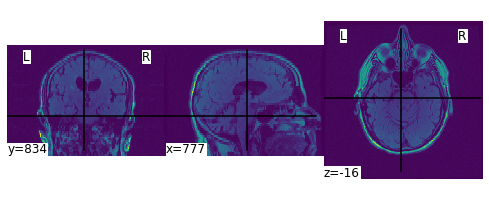

In [62]:
plotting.plot_img(img)

In [55]:
print(img.affine)

[[ 5.27300000e-01  0.00000000e+00  0.00000000e+00  6.46736023e+02]
 [ 0.00000000e+00  5.27300000e-01  0.00000000e+00  6.95219971e+02]
 [ 0.00000000e+00  0.00000000e+00  3.00000167e+00 -8.49450989e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [63]:
hdr = img.header
print(hdr.get_xyzt_units())

('mm', 'unknown')


In [64]:
?img.get_fdata

In [69]:
bg_mask = norm.utilities.mask.com(img)

IndexError: tuple index out of range

In [72]:
mask = ants.get_mask(img_data)

AttributeError: 'memmap' object has no attribute 'dimension'